# Mapping problems in Lattice Models with QuTiP: Introduction

Saumya Biswas (sbiswas4@umd.edu)

For more information about QuTiP see [http://qutip.org](http://qutip.org)

We introduce the basic functionality of QuTiPs Lattice1d class of the lattice module.

## Single-particle and Multiparticle physics

All the functionalities of the Lattice1d class are for sigle particle physics. The multi-particle physics calculations can be performed with a subclass of the Lattice1d class which is initiated with an instance of the Lattice1d class and inherits all the information about the lattice and basis.

![title](images/latt_1.png)

## Unitcell structure in the Second Quantized notation
Defining an instance of the Lattice1d class requires formatting the second Quantized Hamiltonian in a unitcell based structure with nearest neighbor coupling only. Howewver, the functionality is limited to single particle physics only in Lattice1d class methods.

\begin{eqnarray}
H = \sum_i \psi_i^{\dagger} D \psi_i + \sum_{i} \left( \psi_i^{\dagger} T \psi_{i+1} +  \psi_{i+1}^{\dagger} T^{\dagger} \psi_i  \right) \label{eq:TB_block} 
\end{eqnarray}

where $\psi_i$ is the annihilation operator for a unit cell at coordinate i,$D$ is the cell Hamiltonian of the unit cell, $T$ is the inter cell hopping. Any 1d lattice can be put in the form of the equation above by resolving it into unit cells with coupling limited to the nearest neighbors only.

The Lattice1d class is based on this unit cell and nearest neighbor hopping format. A unit cell can be comprised of one or more sites with one or more orbitals, spins, excitations or any other degrees of freedom. An 1d lattice with next nearest neighbor coupling can be equivalently represented as a 1d lattice with unit cells of larger size limiting the hopping terms to nearest neighbors only.

## How to Define a One Dimensional Lattice

In [1]:
from qutip import *
from qutip_lattice import *
import matplotlib.pyplot as plt
import numpy as np
import math

## Fermionic operators

In [2]:
N=4
jw=((Sx, 'X'), (Sy, 'Y'), (Sz, 'Z'))
(Sa, _), (Sb, _), (Sc, _) = jw
Opers = Sa, Sb, Sc
zero = 0.*I(N)

n = 3

a_n = a_(N, n, Opers=Opers)
adn = ad(N, n, Opers=Opers)

a_np = a_(N, n, Opers=Opers)
adnp = ad(N, n, Opers=Opers)

In [3]:
anticommutator(a_n, a_np)

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

In [4]:
anticommutator(a_n, adnp)

Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

The wave-packet disperses and trannslates to the right, but the momentum expectation remains zero, since the translation is induced by the dissipation.

## Bosonic operators

In [5]:
N = 5     #number of modes
Bn = 2    #number of energy levels in each bosonic mode

#b_n, b_np dimensions
#N = 3, Bn = 2 gives  dims = [[3, 3, 3], [3, 3, 3]]
#N = 3, Bn = 3 gives  dims = [[4, 4, 4], [4, 4, 4]]
#N = 5, Bn = 2 gives  dims = [[3, 3, 3, 3, 3], [3, 3, 3, 3, 3]]
zero = 0.*b_(N, Bn, 0)*bd(N, Bn, 0)

In [6]:
n = 2
b_n = b_(N, Bn, n)
bdn = bd(N, Bn, n)

n_p = 3
b_np = b_(N, Bn, n_p)
bdnp = bd(N, Bn, n_p)
commutator(b_n, b_np) #== zero for n != np

Quantum object: dims = [[3, 3, 3, 3, 3], [3, 3, 3, 3, 3]], shape = (243, 243), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [7]:
n = 2
b_n = b_(N, Bn, n)
bdn = bd(N, Bn, n)

n_p = 2
b_np = b_(N, Bn, n_p)
bd_np = bd(N, Bn, n_p)
LHS = commutator(b_n, bd_np) #== zero for n != np

BnF = math.factorial(Bn)
RHS = (1. - ((Bn+1)/BnF)*opow(bdn, Bn)*opow(b_n, Bn))
assert LHS == RHS

# Example: Polariton spectrum of the Dicke-Ising model¶

The Hamiltonian of N coupled spin/Two Level Systems(ref. [2]).

\begin{eqnarray}
H_M = \sum\limits_{n=1}^N \omega_0 \sigma^+_n \sigma^-_n + J\sum\limits_{n=1}^{N-1} \left( \sigma^+_n + \sigma^-_n \right)\left( \sigma^+_{n+1} + \sigma^-_{n+1} \right)
\end{eqnarray}

In [8]:
cells = 40
cell_num_site = 1
cell_site_dof = [2]
J = 2
omega0 = 2

In [9]:
H_cell_s = tensor(omega0 * sigmap() * sigmam(), qeye(2))

In [10]:
H_cell_s

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[2. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [11]:
inter_cell_T0 = J* sigmap() + J* sigmap() * sigmam()
inter_cell_T_s = tensor(inter_cell_T0, qeye(2))

In [12]:
inter_cell_T_s

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[2. 0. 2. 0.]
 [0. 2. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

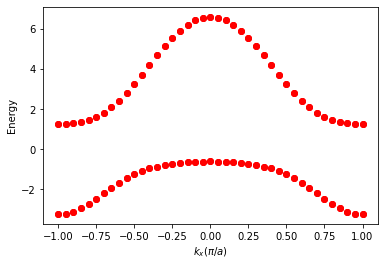

In [13]:
Spin_lattice = Lattice1d(num_cell=cells, boundary = "periodic", cell_num_site = 1,
                         cell_site_dof = [4], Hamiltonian_of_cell = H_cell_s,
                         inter_hop = inter_cell_T_s )
Spin_lattice.plot_dispersion()

In [14]:
ind_l = np.arange(0, 2*cells, 1, dtype=int)

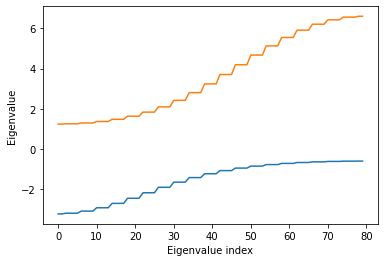

In [15]:
SHam = Spin_lattice.Hamiltonian()
Es = SHam.eigenenergies()

ind_l = np.arange(0, 2*cells, 1, dtype=int)

fig, ax = plt.subplots()
ax.plot(ind_l, Es[0:2*cells] )
ax.plot(ind_l, Es[2*cells:4*cells] )

ax.set_ylabel('Eigenvalue')
ax.set_xlabel('Eigenvalue index')
plt.show(fig)


## The Bose Approximation

\begin{eqnarray}
H_M = \sum\limits_{n=1}^N \omega_0 b^{\dagger}_n b_n + J\sum\limits_{n=1}^{N-1} \left( b^{\dagger}_n + b_n \right)\left( b^{\dagger}_{n+1} + b_{n+1} \right)
\end{eqnarray}

In [16]:
cells = 4
cell_num_site = 1
cell_site_dof = [2]
J = 2
omega0 = 2

In [17]:
N = cells    # number of sites/modes
Np = 4   # bosonic hilbert space dimension

#n = 2
#b_n = b_(N, Np, n)
#bdn = bd(N, Np, n)

#np = 2
#b_np = b_(N, Np, np)
#bdnp = bd(N, Np, np)
#LHS = commutator(b_n, bdnp) #== zero for n != np

In [18]:
H_cell_b = omega0 * create(Np) * destroy(Np)

In [19]:
H_cell_b

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 4. 0.]
 [0. 0. 0. 6.]]

In [20]:
#inter_cell_T_b = J* create(Np) * destroy(Np) + J* destroy(Np) * create(Np)
inter_cell_T_b = J* create(Np) * destroy(Np)

In [21]:
inter_cell_T_b

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 4. 0.]
 [0. 0. 0. 6.]]

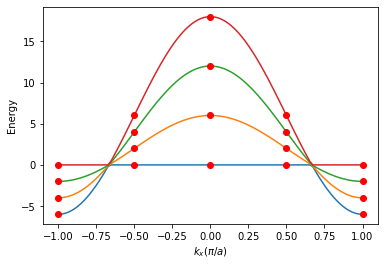

In [22]:
Bose_lattice = Lattice1d(num_cell=cells, boundary = "periodic", cell_num_site = 1,
                         cell_site_dof = [Np], Hamiltonian_of_cell = H_cell_b,
                         inter_hop = inter_cell_T_b )
Bose_lattice.plot_dispersion()

The orange and blue lines are the relevant two bands only.

## The Fermion lattice obtained with a Jordan Wigner Transformation

The Jordan Wigner transformation,
\begin{eqnarray}
\sigma_n^- = \Pi_{j<n}\left( 1 - 2 c_j^{\dagger}c_j  \right) c_n  \nonumber\\
\sigma_n^+ = \Pi_{j<n}\left( 1 - 2 c_j^{\dagger}c_j  \right) c^{\dagger}_n  \nonumber
\end{eqnarray}

yields the fermionic Hamiltonian,
\begin{eqnarray}
H_F = \sum\limits_{n=1}^N \omega_0 c^{\dagger}_n c_n + J\sum\limits_{n=1}^{N-1} \left( c^{\dagger}_n c_{n+1} - c_n c^{\dagger}_{n+1} \right) + J\sum\limits_{n=1}^{N-1} \left( c^{\dagger}_n c^{\dagger}_{n+1} - c_n c_{n+1} \right)
\end{eqnarray}

In [23]:
cells = 4
cell_num_site = 1
cell_site_dof = [2]
J = 2
omega0 = 2

In [24]:
#H_cell_f = omega0 * sigmap() * sigmam()
H_cell_f = omega0/2 * (1+sigmaz())


In [25]:
H_cell_f

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[2. 0.]
 [0. 0.]]

In [26]:
#inter_cell_T_b = J* create(Np) * destroy(Np) + J* destroy(Np) * create(Np)
inter_cell_T_f = J* sigmap()* sigmam() + J*sigmap()

In [27]:
inter_cell_T_f

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[2. 2.]
 [0. 0.]]

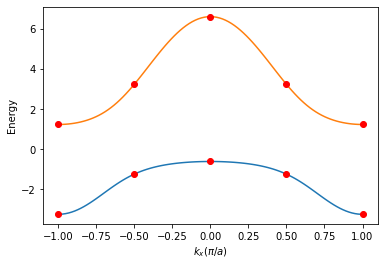

In [28]:
Fermion_lattice = Lattice1d(num_cell=cells, boundary = "periodic", cell_num_site = 1,
                         cell_site_dof = [2], Hamiltonian_of_cell = H_cell_f,
                         inter_hop = inter_cell_T_f )
Fermion_lattice.plot_dispersion()

This model has analytical solution. 
\begin{eqnarray}
H_F = \sum_k E_{F,k} d^{\dagger}_{F,k}d_{F,k} + E_F^0
\end{eqnarray}
The $d_{F,k}, d^{\dagger}_{F,k}$ operators follow the Fermionic anticommutation relationships.


\begin{eqnarray}
\{  d_{F,k}, d^{\dagger}_{F,k} \} = \delta_{k,k}, \ \ \ \{  d^{\dagger}_{F,k}, d^{\dagger}_{F,k} \} = \{  d_{F,k}, d_{F,k} \} = 0 
\end{eqnarray}

With k being the quasi-momentum in the range $0 < k < \pi$,
\begin{eqnarray}
E_{F,k} = \sqrt{\omega_0^2 + 4J^2+ 4J\omega_0 \cos k},
\end{eqnarray}
with the ground state energy,
\begin{eqnarray}
E_F^0 = \frac{1}{2} \left( N \omega_0 - \sum\limits_k E_{F,k}  \right)
\end{eqnarray}


## Holstein Primakoff Transformations

the Holstein-Primakoff transformation,
\begin{eqnarray}
\sigma^+_n = b^{\dagger}_n\sqrt{1-b^{\dagger}_nb_n}= b^{\dagger}_n \left( 1 - \frac{1}{2}b^{\dagger}_nb_n- \frac{1}{8}b^{\dagger}_nb_nb^{\dagger}_nb_n  \right)     \nonumber\\
\sigma^-_n = \sqrt{1-b^{\dagger}_nb_n}b_n=  \left( 1 - \frac{1}{2}b^{\dagger}_nb_n- \frac{1}{8}b^{\dagger}_nb_nb^{\dagger}_nb_n  \right)b_n
\end{eqnarray}

\begin{eqnarray}
H^{(0)}_M = \sum\limits_{n=1}^N \omega_0 b^{\dagger}_n b_n + J\sum\limits_{n=1}^{N-1} \left( b^{\dagger}_n + b_n \right)\left( b^{\dagger}_{n+1} + b_{n+1} \right)
\end{eqnarray}

\begin{eqnarray}
H^{(1)}_M = - \frac{J}{2}\sum\limits_{n=1}^{N-1} b^{\dagger}_n \left\{ \left( b^{\dagger}_n + b_n \right)\left( b^{\dagger}_{n-1} + b_{n-1} + b^{\dagger}_{n+1} + b_{n+1} \right) \right\} b_n
\end{eqnarray}

In [29]:
cells = 4
cell_num_site = 1
J = 2
omega0 = 2

In [30]:
N = cells    # number of sites/modes
Np = 4   # bosonic hilbert space dimension
cell_site_dof = [Np]

In [31]:
#H_cell_f = omega0 * sigmap() * sigmam()
H_cell_hp = omega0/2 * tensor(qeye(2), num(Np))
eta = tensor( sigmaz(), qeye(Np))

In [32]:
H_cell_hp

Quantum object: dims = [[2, 4], [2, 4]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 3.]]

In [33]:
inter_cell_T_hp = J * tensor(sigmap() * sigmam(), num(Np)) + J * tensor(sigmap(), num(Np))
#inter_cell_T_hp = J* tensor( qeye(2), create(Np))

In [34]:
inter_cell_T_hp

Quantum object: dims = [[2, 4], [2, 4]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 2. 0. 0.]
 [0. 0. 4. 0. 0. 0. 4. 0.]
 [0. 0. 0. 6. 0. 0. 0. 6.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

/home/saumya/Desktop/qlat/qutip-lattice/qutip_lattice/lattice.py:3168: ComplexWarning: Casting complex values to real discards the imaginary part
  val_kns[:, ks] = vals[:]


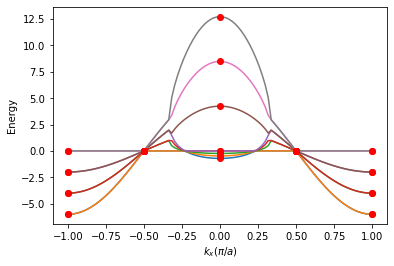

In [35]:
hp_boson_lattice = Lattice1d(num_cell=cells, boundary = "periodic", cell_num_site = 2,
                         cell_site_dof = [Np], Hamiltonian_of_cell = H_cell_hp,
                         inter_hop = inter_cell_T_hp )
hp_boson_lattice.plot_dispersion(bose_d=1)

In [36]:
#HP_Ham = hp_boson_lattice.Hamiltonian() * eta
#Es = HP_Ham.eigenenergies()

#ind_l = np.arange(0, 2*cells, 1, dtype=int)

#fig, ax = plt.subplots()
#ax.plot(ind_l, Es[0:2*cells] )
#ax.plot(ind_l, Es[2*cells:4*cells] )

#ax.set_ylabel('Eigenvalue')
#ax.set_xlabel('Eigenvalue index')
#plt.show(fig)

In [48]:
#N = 5     #number of modes/sites
#Np = 2    #number of energy levels in each bosonic mode

#n = 2
#b_n = b_(N, Np, n)
#bdn = bd(N, Np, n)

#np = 3
#b_np = b_(N, Np, np)
#bdnp = bd(N, Np, np)

### References
[1] J. R. Johansson, P. D. Nation, and F. Nori, Comp. Phys. Comm. 183, 1760 (2012). http://qutip.org 

[2] Erika Cortese, Luigi Garziano, and Simone De Liberato
Phys. Rev. A 96, 053861 (2017)
https://journals.aps.org/pra/abstract/10.1103/PhysRevA.96.053861

In [198]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman and Simon Cross.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.0.dev0+2941f20
Numpy Version:      1.19.1
Scipy Version:      1.5.2
Cython Version:     0.29.21
Matplotlib Version: 3.3.1
Python Version:     3.6.13
Number of CPUs:     4
BLAS Info:          INTEL MKL
OPENMP Installed:   True
INTEL MKL Ext:      True
Platform Info:      Linux (x86_64)
Installation path:  /home/ssaumya7/Desktop/qutip_serenity/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `q

In [132]:
qutip.cite()

@article{qutip2,
doi = {10.1016/j.cpc.2012.11.019},
url = {https://doi.org/10.1016/j.cpc.2012.11.019},
year  = {2013},
month = {apr},
publisher = {Elsevier {BV}},
volume = {184},
number = {4},
pages = {1234--1240},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP} 2: A {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
@article{qutip1,
doi = {10.1016/j.cpc.2012.02.021},
url = {https://doi.org/10.1016/j.cpc.2012.02.021},
year  = {2012},
month = {aug},
publisher = {Elsevier {BV}},
volume = {183},
number = {8},
pages = {1760--1772},
author = {J.R. Johansson and P.D. Nation and F. Nori},
title = {{QuTiP}: An open-source {P}ython framework for the dynamics of open quantum systems},
journal = {Computer Physics Communications}
}
